<a href="https://colab.research.google.com/github/Simmus7/IA_Python/blob/main/IA_MIN_MAX_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pydot
from IPython.display import Image, display
import queue
import numpy as np

Podemos reusar la clase nodo y árbol desarrollada para los algoritmos de búsqueda a ciega y búsqueda heurística. Adicionando el método minimax y alfa-beta a la última

In [2]:
class Node ():
  def __init__(self, state,value,operators,operator=None, parent=None,objective=None):
    self.state= state
    self.value = value
    self.children = []
    self.parent=parent
    self.operator=operator
    self.objective=objective
    self.level=0
    self.operators=operators
    self.v=0

    
  def add_child(self, value, state, operator):
    node=type(self)(value=value, state=state, operator=operator,parent=self,operators=self.operators)
    node.level=node.parent.level+1
    self.children.append(node)
    return node
  
  def add_node_child(self, node):
    node.level=node.parent.level+1
    self.children.append(node)    
    return node

  #Devuelve todos los estados según los operadores aplicados
  def getchildrens(self):
    return [
        self.getState(i) 
          if not self.repeatStatePath(self.getState(i)) 
            else None for i, op in enumerate(self.operators)]
    
  def getState(self, index):
    pass
  
  def __eq__(self, other):
    return self.state == other.state
 
  def __lt__(self, other):
    return self.f() < other.f()
   
  
  def repeatStatePath(self, state):
      n=self
      while n is not None and n.state!=state:
          n=n.parent
      return n is not None
    
  def pathObjective(self):
      n=self
      result=[]
      while n is not None:
          result.append(n)
          n=n.parent
      return result
  
  def heuristic(self):
    return 0
  
  def cost(self):
    return 1
  
  def f(self): 
    return self.cost()+self.heuristic()

  ### Crear método para criterio objetivo
  ### Por defecto vamos a poner que sea igual al estado objetivo, para cada caso se puede sobreescribir la función
  def isObjective(self):
    return (self.state==self.objetive.state)


In [3]:
class Tree ():
  def __init__(self, root ,operators):
    self.root=root
    self.operators=operators

  def printPath(self,n):
    stack=n.pathObjective()
    path=stack.copy()
    while len(stack)!=0:
        node=stack.pop()
        if node.operator is not None:
            print(f'operador:  {self.operators[node.operator]} \t estado: {node.state}')
        else:
            print(f' {node.state}')
    return path

  def reinitRoot(self):
    self.root.operator=None
    self.root.parent=None
    self.root.objective=None
    self.root.children = []
    self.root.level=0

  ## Primero a lo ancho
  def breadthFirst(self,endState):
    self.reinitRoot()
    pq=queue.Queue()
    pq.put(self.root)
    while not pq.empty():
      node=pq.get()
      children=node.getchildrens()
      for i,child in enumerate(children):
        if child is not None:
          newChild=node.add_child(value=node.value+'-'+str(i), state=child, operator=i)
          pq.put(newChild)
          if endState==child:
            return newChild

  ## Primero en profundidad
  def dephFirst(self, endState):
    self.reinitRoot()
    pq=[]
    pq.append(self.root)    
    while len(pq)>0:
      node=pq.pop()
      if (node.parent is not None):
        node.parent.add_node_child(node)
      children=node.getchildrens()
      temp=[]
      for i,child in enumerate(children):
        if child is not None:
          newChild=type(self.root)(value=node.value+'-'+str(i),state=child,operator=i,parent=node, operators=node.operators)
          temp.append(newChild)
          if endState==child:
            node.add_node_child(newChild)
            return newChild
      #Adicionar los hijos en forma inversa para que salga primero el primero que se adicionó
      temp.reverse()
      for e in temp:
        pq.append(e)
  
  ## Costo uniforme
  def costUniform(self,endState):
    self.reinitRoot()
    pq=queue.PriorityQueue()
    pq.put((self.root.cost(),self.root))
    while not pq.empty():
      node=pq.get()[1]
      children=node.getchildrens()
      for i,child in enumerate(children):
        if child is not None:
          newChild=node.add_child(value=node.value+'-'+str(i), 
                                  state=child, operator=i)
          pq.put((newChild.cost(),newChild))
          if endState==child:
            return newChild

  ## Primero el mejor 
  def bestFirst(self,endState):
    self.reinitRoot()
    pq=queue.PriorityQueue()
    pq.put((self.root.heuristic(),self.root))
    while not pq.empty():
      node=pq.get()[1]
      children=node.getchildrens()
      for i,child in enumerate(children):
        if child is not None:
          newChild=node.add_child(value=node.value+'-'+str(i), 
                                  state=child, operator=i)
          pq.put((newChild.heuristic(),newChild))
          if endState==child:
            return newChild

  ## A*
  def Aasterisk(self,endState):
    self.reinitRoot()
    pq=queue.PriorityQueue()
    pq.put((self.root.f(),self.root))
    while not pq.empty():
      node=pq.get()[1]
      children=node.getchildrens()
      for i,child in enumerate(children):
        if child is not None:
          newChild=node.add_child(value=node.value+'-'+str(i), 
                                  state=child, operator=i)
          pq.put((newChild.f(),newChild))
          if endState==child:
            return newChild

    ## Generar los hijos del nodo 

  def miniMax(self, depth):
    self.root.v=self.miniMaxR(self.root, depth, self.root.player)
    ## Comparar los hijos de root
    values=[c.v for c in self.root.children]
    if self.root.player:
      maxvalue=max(values)
      index=values.index(maxvalue)
    else:
      maxvalue=min(values)
      index=values.index(maxvalue)

    return self.root.children[index]

  def miniMaxR(self, node, depth, maxPlayer):
    #Condición de parada
    if depth==0 or node.isObjective():
      node.v=node.heuristic()
      return node.heuristic()
    ## Generar los hijos del nodo
    children=node.getchildrens()
    
    ## Según el jugador que sea en el árbol
    if maxPlayer:
      value=float('-inf')
      for i,child in enumerate(children):
        if child is not None:
          newChild=type(self.root)(value=node.value+'-'+str(i),state=child,operator=i,parent=node, 
                                   operators=node.operators,player=False)
          newChild=node.add_node_child(newChild)
          value=max(value,self.miniMaxR(newChild,depth-1,False))
    else:
      value=float('inf')
      for i,child in enumerate(children):
        if child is not None:
          newChild=type(self.root)(value=node.value+'-'+str(i),state=child,operator=i,parent=node,
                                   operators=node.operators,player=True)
          newChild=node.add_node_child(newChild)
          value=min(value,self.miniMaxR(newChild,depth-1,True))
    node.v=value
    return value

  ## Método para dibujar el árbol        
  def draw(self,path):
    graph = pydot.Dot(graph_type='graph')
    nodeGraph=pydot.Node(str(self.root.state)+"-"+str(0),
                          label=str(self.root.state),shape ="circle", 
                          style="filled", fillcolor="red")
    graph.add_node(nodeGraph)
    path.pop()
    return self.drawTreeRec(self.root,nodeGraph,graph,0,path.pop(),path)
  
  ## Método recursivo para dibujar el árbol  
  def drawTreeRec(self,r,rootGraph,graph,i,topPath,path):
    if r is not None:
      children=r.children
      for j,child in enumerate(children):
        i=i+1
        color="white"
        if topPath.value==child.value:
          if len(path)>0:topPath=path.pop()
          color='red'
        c=pydot.Node(child.value,label=str(child.state)+r"\n"+r"\n"+"f="+str(child.heuristic())+r"\n"+str(child.v), 
                      shape ="circle", style="filled", 
                      fillcolor=color)
        graph.add_node(c)
        graph.add_edge(pydot.Edge(rootGraph, c, 
                                  label=str(child.operator)+'('+str(child.cost())+')'))
        graph=self.drawTreeRec(child,c,graph,i,topPath,path)  # recursive call
      return graph
    else:
      return graph  

Vamos a suponer que se comienza con Max (True) y que Max es X

la función sería:

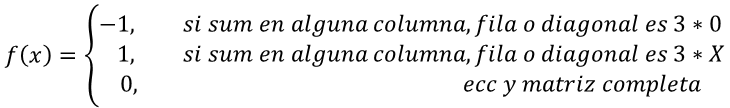

In [4]:
f=['X','O','X']
v=[f[0]==x for x in f]
print(v)
all(v)

[True, False, True]


False

In [5]:
class NodeTicTacToe(Node):
  ## Vamos a añadir el jugador, pues en dependencia del jugador se hace una cosa u otra.

  def __init__(self, player=True,**kwargs):
    super(NodeTicTacToe, self).__init__(**kwargs)
    self.player=player
    if player:
      self.v=float('-inf')
    else:
      self.v=float('inf')
  
  def getState(self, index):
    state=self.state
    nextState=None
    (x,y)=self.operators[index]
    if state[x][y]==' ':
      nextState= [f.copy() for f in state]
      if self.player==True: ## Si es Max se pone X    
        nextState[x][y]='X'
      else: ## Si es Max se pone X
        nextState[x][y]='O'
    return nextState if state!=nextState else None

  #Costo acumulativo(valor 1 en cada nivel)
  def cost(self):
    return self.level
  
  ##Ver si el nodo es un nodo objetivo para O o para X, o hay empate
  def isObjective(self):
    a=[f.copy() for f in self.state]
    b=np.array(a).T
    a.append(np.diag(self.state))
    a.append(np.flipud(self.state).diagonal())
    a=np.array(a)
    c=np.concatenate((a,b),axis=0)

    #print(c)
    for f in c:
      if f[0]!=' ' and all(x == f[0] for x in f):
        return True
    ### Empate
    if not np.in1d([' '], self.state):
      return True
    return False 

  #Pendiente de probar, puede fallar si el código no funciona al final
  #Retorna 1 si va a ganar max, -1 si va a ganar min, y 0 si nadie va a ganar
  def playerIsAboutToWin (self, c):
    if self.player:
      for f in c:
        cont = 0
        space = False
        for i in f:
          if i == 'X':
            cont = cont + 1
          if i == 'O':
            cont = cont - 1
          if i == ' ':
            space = True
        if (space and cont == 2):
            return 1
      else:
        for f in c:
          cont = 0
          space = False
          for i in f:
            if i == 'O':
              cont = cont + 1
            if i == 'X':
              cont = cont - 1
            if i == ' ':
              space = True
          if (space and cont == 2):
              return -1
    return 0

  ## Si es nodo objetivo, si X retornamos 1, si O -1 y si no 0
  def heuristic(self):
    a=[f.copy() for f in self.state]
    b=np.array(a).T
    a.append(np.diag(self.state))
    a.append(np.flipud(self.state).diagonal())
    a=np.array(a)
    c=np.concatenate((a,b),axis=0)
    ## Estados ganadores para Max y Min
    for f in c:
      if f[0]!=' ' and all(x == f[0] for x in f):
        return 26 if f[0]=='X' else -26
    ## Empate
    if not np.in1d([' '], self.state):
      return 0

    #Si va a jugar max hay que verificar si estoy apunto de ganar
    #print(self.playerIsAboutToWin(c))
    if self.player:
      if self.playerIsAboutToWin(c) == 1:
        return 26
    else: 
      if self.playerIsAboutToWin(c) == -1:
        return -26
    
    #Si nada de lo anterior pasa, estamos en una pocisión normal, común, donde nadie ha ganado, nadie ha empatado
    #Y nadie directamente está apunto de ganar

    cont = 0
    cont2 = 0
    for f in c:
      for i in f:
        if i == 'X':
          cont = cont+1
        if i == 'O':
          cont2 = cont2+1

    return cont - cont2

In [6]:
#'poner ficha en casilla vacía fila f, columna c', lista de posiciones para poner la ficha
initState=[['O','X',' '], 
           [' ','X',' '], 
           [' ',' ',' ']]

#initState=[['O',' ','X'], 
   #        [' ','X',' '], 
    #       [' ',' ',' ']]

operators=[(i,j) for i,f in enumerate(initState) for j,c in enumerate(f)]

In [7]:
operators

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [8]:
nodeInit=NodeTicTacToe(False,value="inicio",state=initState, operators= operators)
print(nodeInit.heuristic())
print(nodeInit.isObjective())
treeMinMax= Tree(nodeInit,operators)

3
False


In [9]:
objective=treeMinMax.miniMax(2)
print(objective.state)

[['O', 'X', ' '], [' ', 'X', ' '], [' ', 'O', ' ']]


 [['O', 'X', ' '], [' ', 'X', ' '], [' ', ' ', ' ']]
operador:  (2, 1) 	 estado: [['O', 'X', ' '], [' ', 'X', ' '], [' ', 'O', ' ']]


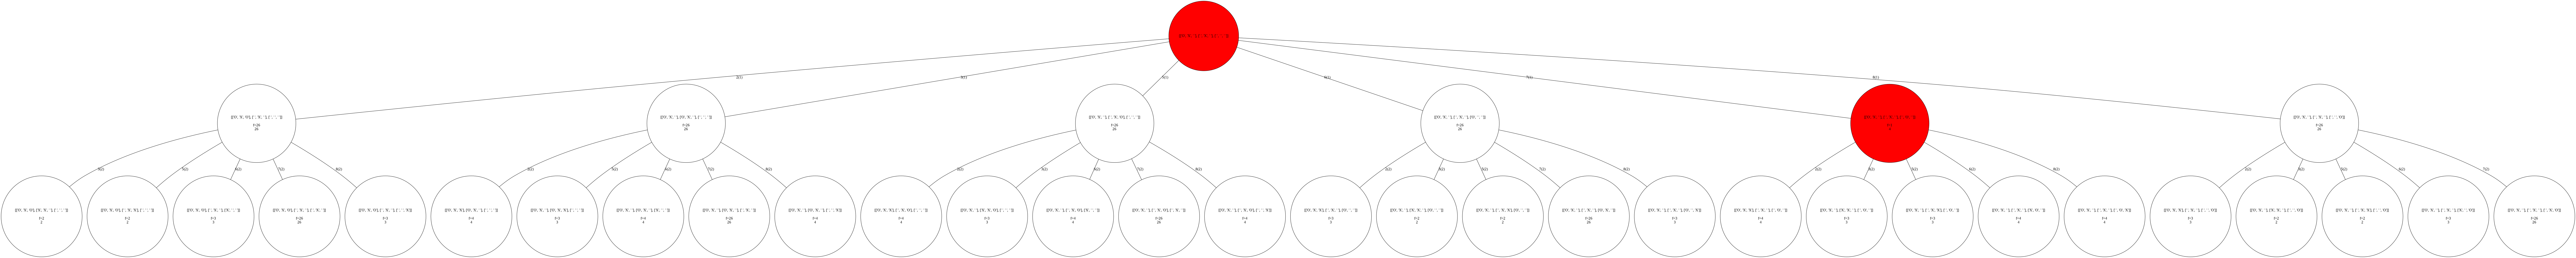

In [10]:
path=treeMinMax.printPath(objective)
graph=treeMinMax.draw(path.copy())
tree_image = Image(graph.create_png(), width=2000, height=1000)
display(tree_image)